#         Multi-class Medical CXR Image Classification using Traditional ML, Ensemble Learning and Deep Learning (CNN)

---




# CMPS460 Machine Learning Project - Spring 2024

Group 1:

Aisha Abdul Quadir - 202009566<br>
Hanan Bawazir - 202003093<br>
Mariam Bawazir - 202003094<br>

Emails: aa2009566@student.qu.edu.qa; hb2003093@student.qu.edu.qa; mb2003094@student.qu.edu.qa;
<br><br>
Instructor: Dr. Abdelkarim Erradi
<br><br>
Google Colab Link: https://colab.research.google.com/drive/1y0Fw55ljIhheWXjPtsiGs0Bk_4DrtEg7?usp=sharing

## **Project Objective**

The project aims to use machine learning techniques to create three models that will aid in diagnosing COVID-19. The models will analyze X-ray images of the lungs determine whether the person has COVID-19, Non-COVID related infection or a Normal result.
<br><br>
The project will explore the application of machine learning in real-world scenarios like the health field.

Three types of models will be explored in this project which are a traditional machine learning model (Decision Tree), ensemble learning model (Random Forest) and a deep learning model (CNN).

## **Dataset**

**COVID-QU-Ex Dataset** </br>
The researchers of Qatar University have compiled the COVID-QU-Ex dataset, which consists of 33,920 chest X-ray (CXR) images including:

*   11,956 COVID-19
*   11,263 Non-COVID infections (Viral or Bacterial Pneumonia)
*   10,701 Normal

Access the dataset through this link [COVID-QU-Ex Dataset](https://www.kaggle.com/datasets/anasmohammedtahir/covidqu/)</br>

---

 **Citation**

1.    A. M. Tahir, M. E. H. Chowdhury, A. Khandakar, Y. Qiblawey, U. Khurshid, S. Kiranyaz, N. Ibtehaz, M. S. Rahman, S. Al-Madeed, S. Mahmud, M. Ezeddin, K. Hameed, and T. Hamid, “COVID-19 Infection Localization and Severity Grading from Chest X-ray Images”, Computers in Biology and Medicine, vol. 139, p. 105002, 2021, https://doi.org/10.1016/j.compbiomed.2021.105002.
2.    Anas M. Tahir, Muhammad E. H. Chowdhury, Yazan Qiblawey, Amith Khandakar, Tawsifur Rahman, Serkan Kiranyaz, Uzair Khurshid, Nabil Ibtehaz, Sakib Mahmud, and Maymouna Ezeddin, “COVID-QU-Ex .” Kaggle, 2021, https://doi.org/10.34740/kaggle/dsv/3122958.
3.    T. Rahman, A. Khandakar, Y. Qiblawey A. Tahir S. Kiranyaz, S. Abul Kashem, M. Islam, S. Al Maadeed, S. Zughaier, M. Khan, M. Chowdhury, "Exploring the Effect of Image Enhancement Techniques on COVID-19 Detection using Chest X-rays Images," Computers in Biology and Medicine, p. 104319, 2021, https://doi.org/10.1016/j.compbiomed.2021.104319.
4.    A. Degerli, M. Ahishali, M. Yamac, S. Kiranyaz, M. E. H. Chowdhury, K. Hameed, T. Hamid, R. Mazhar, and M. Gabbouj, "Covid-19 infection map generation and detection from chest X-ray images," Health Inf Sci Syst 9, 15 (2021), https://doi.org/10.1007/s13755-021-00146-8.
5.    M. E. H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M. A. Kadir, Z. B. Mahbub, K. R. Islam, M. S. Khan, A. Iqbal, N. A. Emadi, M. B. I. Reaz, M. T. Islam, "Can AI Help in Screening Viral and COVID-19 Pneumonia?," IEEE Access, vol. 8, pp. 132665-132676, 2020, https://doi.org/10.1109/ACCESS.2020.3010287.








## **Dependencies**

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from pathlib import Path
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

!pip install torchviz
!apt-get install graphviz
base_path = 'Lung Segmentation Data/Lung Segmentation Data'

## **Downloading the dataset**

In [ ]:
os.environ['KAGGLE_USERNAME'] = "lingosnacks"
os.environ['KAGGLE_KEY'] = "4b3f8fd4b4aed8aec9b1f86530cc5f09"

In [ ]:
!kaggle datasets download anasmohammedtahir/covidqu

Dataset URL: https://www.kaggle.com/datasets/anasmohammedtahir/covidqu
License(s): CC-BY-SA-4.0
 99% 1.14G/1.15G [00:10<00:00, 175MB/s]
100% 1.15G/1.15G [00:10<00:00, 119MB/s]


In [ ]:
!unzip covidqu.zip

Streaming output truncated to the last 5000 lines.
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10835).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10836).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10837).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10838).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10839).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10840).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10841).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/non_COVID (10843).png  
  inflating: Lung Segmentation Data/Lung Segmentation Data/Val/Non-COVID/lung masks/n



-------



## **Exploratory Data Analysis**

In [ ]:
os.listdir(base_path)

['Train', 'Test', 'Val']

In the provided dataset, the data has already been split into training, testing and validation sets.

As shown below, there are three classes ('COVID-19','Non-COVID' and 'Normal') within each set.

In [ ]:
os.listdir(f'{base_path}/Train')

['Non-COVID', 'COVID-19', 'Normal']

In [ ]:
os.listdir(f'{base_path}/Test')

['Non-COVID', 'COVID-19', 'Normal']

In [ ]:
os.listdir(f'{base_path}/Val')

['Non-COVID', 'COVID-19', 'Normal']

Exploring the distribution of classes:

In [ ]:
num_normal_images = len(os.listdir(f'{base_path}/Train/Normal/images')) + len(os.listdir(f'{base_path}/Test/Normal/images')) + len(os.listdir(f'{base_path}/Val/Normal/images'))
num_covid_images = len(os.listdir(f'{base_path}/Train/COVID-19/images')) + len(os.listdir(f'{base_path}/Test/COVID-19/images')) + len(os.listdir(f'{base_path}/Val/COVID-19/images'))
num_non_covid_images = len(os.listdir(f'{base_path}/Train/Non-COVID/images')) + len(os.listdir(f'{base_path}/Test/Non-COVID/images')) + len(os.listdir(f'{base_path}/Val/Non-COVID/images'))

In [ ]:
data = pd.DataFrame(
    {
        "Label": ['Normal', 'Non-COVID', 'COVID-19'],
        "Count": [num_normal_images, num_non_covid_images, num_covid_images],
    }
)

data = data.sort_values(by="Count", ascending=False)
data.style.background_gradient(cmap="YlOrRd")

,Label,Count
2,COVID-19,11956
1,Non-COVID,11263
0,Normal,10701


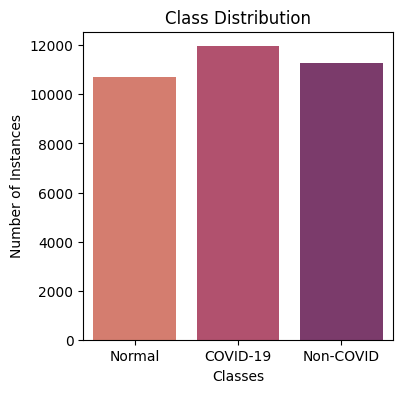

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(4, 4))
sns.barplot(
    x=["Normal", "COVID-19", "Non-COVID"],  # x-axis labels
    y=[num_normal_images, num_covid_images, num_non_covid_images],
    palette="flare",
    hue = ["Normal", "COVID-19", "Non-COVID"],
    legend=False
)

# Adding labels and title
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')

# Show the plot
plt.show()

The dataset is slightly imbalanced, with relatively close counts for each class (around 1200 samples difference at most), but not severely so.

In [ ]:
def get_total(split):
  return len(os.listdir(f'{base_path}/{split}/COVID-19/images')) +\
          len(os.listdir(f'{base_path}/{split}/Non-COVID/images')) +\
          len(os.listdir(f'{base_path}/{split}/Normal/images'))

def get_length(label, split):
  return len(os.listdir(f'{base_path}/{split}/{label}/images'))

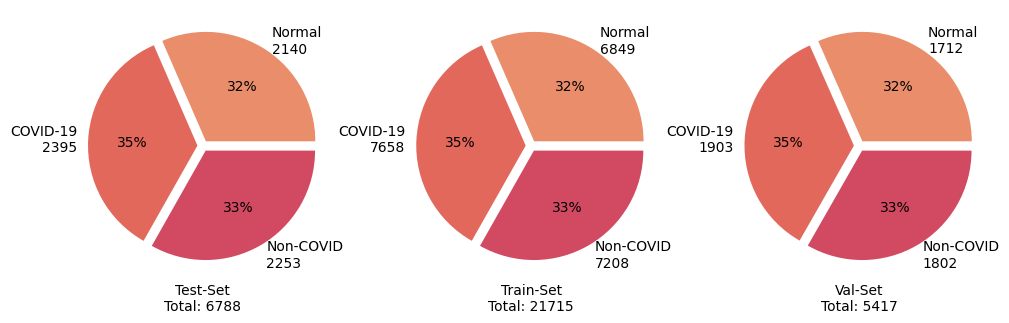

In [ ]:
explode = (0.05, 0.05, 0.05)
subset_labels = ["Test", "Train", "Val"]

fig, axes = plt.subplots(1, 3, figsize=(12, 8))

for ax, subset in zip(axes, subset_labels):
    percentages = [get_length("Normal", subset), get_length("COVID-19", subset), get_length("Non-COVID", subset)]
    ax.pie(percentages, labels=[f"Normal\n{get_length('Normal', subset)}",
                                f"COVID-19\n{get_length('COVID-19', subset)}",
                                f"Non-COVID\n{get_length('Non-COVID', subset)}"],
           explode=explode, autopct='%.0f%%', colors=sns.color_palette('flare'))
          #  palette="flare")
    tot = get_total(subset)
    ax.text(0.5, -0.10, f"{subset}-Set\nTotal: {tot}", size=10, ha="center", transform=ax.transAxes)

# fig.suptitle("Distribution of Dataset Subsets")
plt.show()

The dataset's class distribution appears to be evenly spread, indicating a lack of bias towards any specific class within the model.

Displaying Random Images from each class and each dataset:

In [ ]:
def get_random_img(label):
    image_Tr = random.choice(os.listdir(f'{base_path}/Train/{label}/images/'))
    image_Vl = random.choice(os.listdir(f'{base_path}/Val/{label}/images/'))
    image_Ts = random.choice(os.listdir(f'{base_path}/Test/{label}/images/'))

    # Return the path to the randomly selected images
    return os.path.join(base_path + f'/Train/{label}/images/', imageTr), os.path.join(base_path + f'/Val/{label}/images/', imageVl), os.path.join(base_path + f'/Test/{label}/images/', imageTs)

In [ ]:
def plt_img(axis, image):
    # Display the image on the specified axis
    axis.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Add text annotation for image size beneath the image
    axis.text(0.5, -0.10, f"Image size: {image.shape[1]} x {image.shape[0]}", size=10, ha="center", transform=axis.transAxes)

    # Hide axes
    axis.axis('off')

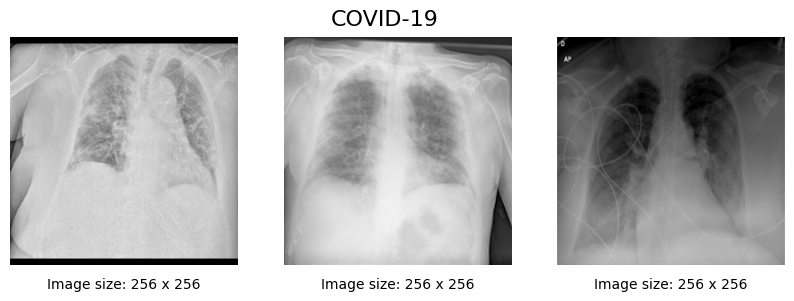

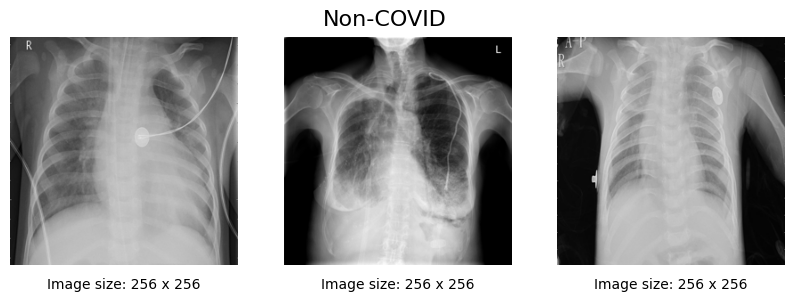

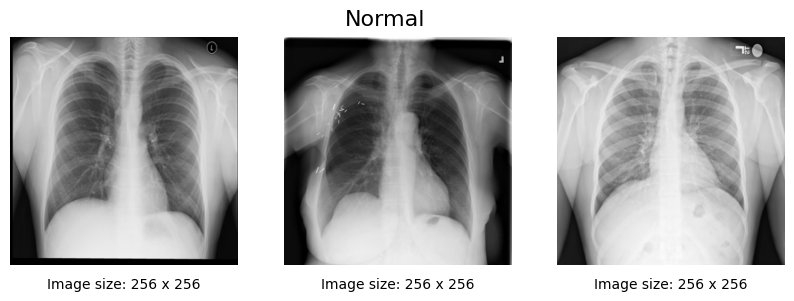

In [ ]:
def display_images(label):
    # Load random images
    img_tr, img_vl, img_ts = get_random_img(label)
    img1 = cv2.imread(img_tr)
    img2 = cv2.imread(img_vl)
    img3 = cv2.imread(img_ts)

    # Create subplots with three axes
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))
    # Display the images
    plt_img(ax1, img1)
    plt_img(ax2, img2)
    plt_img(ax3, img3)

    # Add a title to the figure
    fig.suptitle(label, fontsize=16, y=0.85)
    plt.show()

display_images('COVID-19')
display_images('Non-COVID')
display_images('Normal')

We can observe that the images are of size 256x256.



-------



## **Traditional ML Model - Decision Tree**

For the traditional machine learning model, we chose to use decision tree for our task since this is a multi-class classification problem. Moreover, since our dataset are X-ray images, there is no linear relationship between our features. Therefore, decision tree would be more appropriate among the traditional machine learning models.

### Data Preparation and Preprocessing

Due to the constraints of a free Google Colab account in terms of the RAM and processing time allowed per session, the size of the images were reduced to 128x128.

In [ ]:
class ChestXRayDatasetDF():
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.classes = [cls for cls in os.listdir(root_dir) if "lung masks" not in cls.lower()]
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}
        self.images = []
        self.image_classes = []
        for cls in self.classes:
            class_path = os.path.join(root_dir, cls, "images")
            for img_name in os.listdir(class_path):
              image = cv2.resize(cv2.imread(os.path.join(class_path, img_name)), dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
              flattened_array = image.flatten()
              self.images.append(flattened_array)
              self.image_classes.append(cls)

        feature_columns = [f'Pixel{x}' for x in range(128*128*3)]
        self.df = pd.DataFrame(self.images, columns = feature_columns)
        self.df['Class'] = self.image_classes

    def __len__(self):
        return len(self.images)

In [ ]:
training_dataset = ChestXRayDatasetDF(root_dir=f'/content/{base_path}/Train/').df
testing_dataset = ChestXRayDatasetDF(root_dir=f'/content/{base_path}/Test/').df
validation_dataset = ChestXRayDatasetDF(root_dir=f'/content/{base_path}/Val/').df

In [ ]:
training_dataset.head()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel49143,Pixel49144,Pixel49145,Pixel49146,Pixel49147,Pixel49148,Pixel49149,Pixel49150,Pixel49151,Class
0,3,3,3,1,1,1,0,0,0,1,...,26,26,26,17,17,17,10,10,10,COVID-19
1,0,0,0,0,0,0,9,9,9,0,...,0,0,0,0,0,0,0,0,0,COVID-19
2,77,77,77,79,79,79,79,79,79,79,...,82,82,82,84,84,84,81,81,81,COVID-19
3,7,7,7,7,7,7,7,7,7,7,...,99,99,99,87,87,87,52,52,52,COVID-19
4,29,29,29,106,106,106,116,116,116,114,...,87,87,87,107,107,107,67,67,67,COVID-19


In [ ]:
testing_dataset.head()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel49143,Pixel49144,Pixel49145,Pixel49146,Pixel49147,Pixel49148,Pixel49149,Pixel49150,Pixel49151,Class
0,30,30,30,0,0,0,0,0,0,0,...,153,153,153,150,150,150,158,158,158,COVID-19
1,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,1,1,1,COVID-19
2,70,70,70,71,71,71,71,71,71,71,...,67,67,67,67,67,67,63,63,63,COVID-19
3,78,78,78,20,20,20,4,4,4,4,...,15,15,15,42,42,42,40,40,40,COVID-19
4,155,155,155,82,82,82,44,44,44,27,...,107,107,107,95,95,95,64,64,64,COVID-19


In [ ]:
validation_dataset.head()

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel49143,Pixel49144,Pixel49145,Pixel49146,Pixel49147,Pixel49148,Pixel49149,Pixel49150,Pixel49151,Class
0,79,79,79,74,74,74,69,69,69,65,...,8,8,8,13,13,13,16,16,16,COVID-19
1,81,81,81,79,79,79,79,79,79,83,...,132,132,132,123,123,123,106,106,106,COVID-19
2,10,10,10,10,10,10,10,10,10,10,...,11,11,11,11,11,11,11,11,11,COVID-19
3,10,10,10,0,0,0,0,0,0,0,...,56,56,56,38,38,38,29,29,29,COVID-19
4,6,6,6,7,7,7,8,8,8,8,...,12,12,12,11,11,11,30,30,30,COVID-19


We will be providing all 49152 (128 * 128 * 3) pixels of the 128x128 images as features to the decision tree.

#### Label Encoding

In [ ]:
#Label_Encoder
label_encoder = LabelEncoder()
training_dataset['Class'] = label_encoder.fit_transform(training_dataset['Class'])
testing_dataset['Class'] = label_encoder.fit_transform(testing_dataset['Class'])
validation_dataset['Class'] = label_encoder.fit_transform(validation_dataset['Class'])

#### Preparing the training, validation and testing splits

In [ ]:
X_train = training_dataset.drop(['Class'], axis=1)
X_test = testing_dataset.drop(['Class'], axis=1)
X_val = validation_dataset.drop(['Class'], axis=1)
y_train = training_dataset['Class']
y_test = testing_dataset['Class']
y_val = validation_dataset['Class']

### Decision Tree Model Training

#### Decision Tree (max_depth = 10000)

We start with training a decision tree with a max_depth of 10000 on a random basis.

In [ ]:
#Decision Tree with max_depth = 10000

dt_clf_10000 = DecisionTreeClassifier(max_depth = 10000, random_state = 42)
dt_clf_10000.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10000, random_state=42)

In [ ]:
print('Decision Tree max_depth = 10000')
y_train_pred = dt_clf_10000.predict(X_train)
y_val_pred = dt_clf_10000.predict(X_val)
training_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Training accuracy = {training_accuracy*100:.2f}%')
print(f'Validation accuracy = {val_accuracy*100:.2f}%')

Decision Tree max_depth = 10000
Training accuracy = 100.00%
Validation accuracy = 65.42%


Observing the above training and validation accuracy, there may be a case of overfitting using max_depth = 10000.

#### GridSearch

Performing hyperparameter tuning using GridSearch

In [ ]:
params = {
    'max_leaf_nodes': [100,500],
    'max_depth': [50,100,500,1000]
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3, n_jobs=-1)

grid_search_cv.fit(X_train, y_train)

y_pred = grid_search_cv.predict(X_val)

print(f'Validation Accuracy = {accuracy_score(y_val, y_pred)*100:.2f}%')
print(f'Best Cross Validation Score = {grid_search_cv.best_score_*100:.2f}%')
print('Best Parameters:')
print(grid_search_cv.best_params_)

Validation Accuracy = 69.10%
Best Cross Validation Score = 67.00%
Best Parameters:
{'max_depth': 50, 'max_leaf_nodes': 100}


Testing the above ranges of parameters, we got the best max_leaf_nodes as 100 and the best max_depth as 50.

We can perform another grid search while searching for a max_depth that could be better than 50 and also checking if we can find a lower max_leaf_nodes.

In [ ]:
params = {
    'max_leaf_nodes': [50,100],
    'max_depth': [20,30,40]
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3, n_jobs=-1)

grid_search_cv.fit(X_train, y_train)

y_pred = grid_search_cv.predict(X_val)

print(f'Validation Accuracy = {accuracy_score(y_val, y_pred)*100:.2f}%')
print(f'Best Cross Validation Score = {grid_search_cv.best_score_*100:.2f}%')
print('Best Parameters:')
print(grid_search_cv.best_params_)

Validation Accuracy = 69.10%
Best Cross Validation Score = 67.25%
Best Parameters:
{'max_depth': 20, 'max_leaf_nodes': 100}


We found a max_depth (20) which is lower than the original one but with the same validation accuracy. In this case, this model is a better one as it is a simpler model.

We can perform another grid search to find a model that has an even lower max_depth. We can also check if we will have a significant improvement in performance if we chose a higher max_leaf_nodes.

In [ ]:
params = {
    'max_leaf_nodes': [50,100,200],
    'max_depth': [10,20]
}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3, n_jobs=-1)

grid_search_cv.fit(X_train, y_train)

y_pred = grid_search_cv.predict(X_val)

print(f'Validation Accuracy = {accuracy_score(y_val, y_pred)*100:.2f}%')
print(f'Best Cross Validation Score = {grid_search_cv.best_score_*100:.2f}%')
print('Best Parameters:')
print(grid_search_cv.best_params_)

Validation Accuracy = 68.97%
Best Cross Validation Score = 67.95%
Best Parameters:
{'max_depth': 20, 'max_leaf_nodes': 200}


We found parameters that have a higher cross validation score but a lower accuracy on the validation set. This model would be more complex than the previous one.

Therefore, it would be better to go with the simpler model with the higher validation accuracy.

Hence, we will use a decision tree model with the parameters, max_depth=20 and max_leaf_nodes = 100.

#### Decision Tree with the Best Parameters found using GridSearch

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth = 20, max_leaf_nodes = 100, random_state = 42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=100, random_state=42)

In [ ]:
print('Decision Tree (max_depth = 20 ; max_leaf_nodes = 100)')
y_train_pred = dt_clf.predict(X_train)
y_val_pred = dt_clf.predict(X_val)
training_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Training accuracy = {training_accuracy*100:.2f}%')
print(f'Validation accuracy = {val_accuracy*100:.2f}%')

Decision Tree (max_depth = 20 ; max_leaf_nodes = 100)
Training accuracy = 73.27%
Validation accuracy = 69.10%


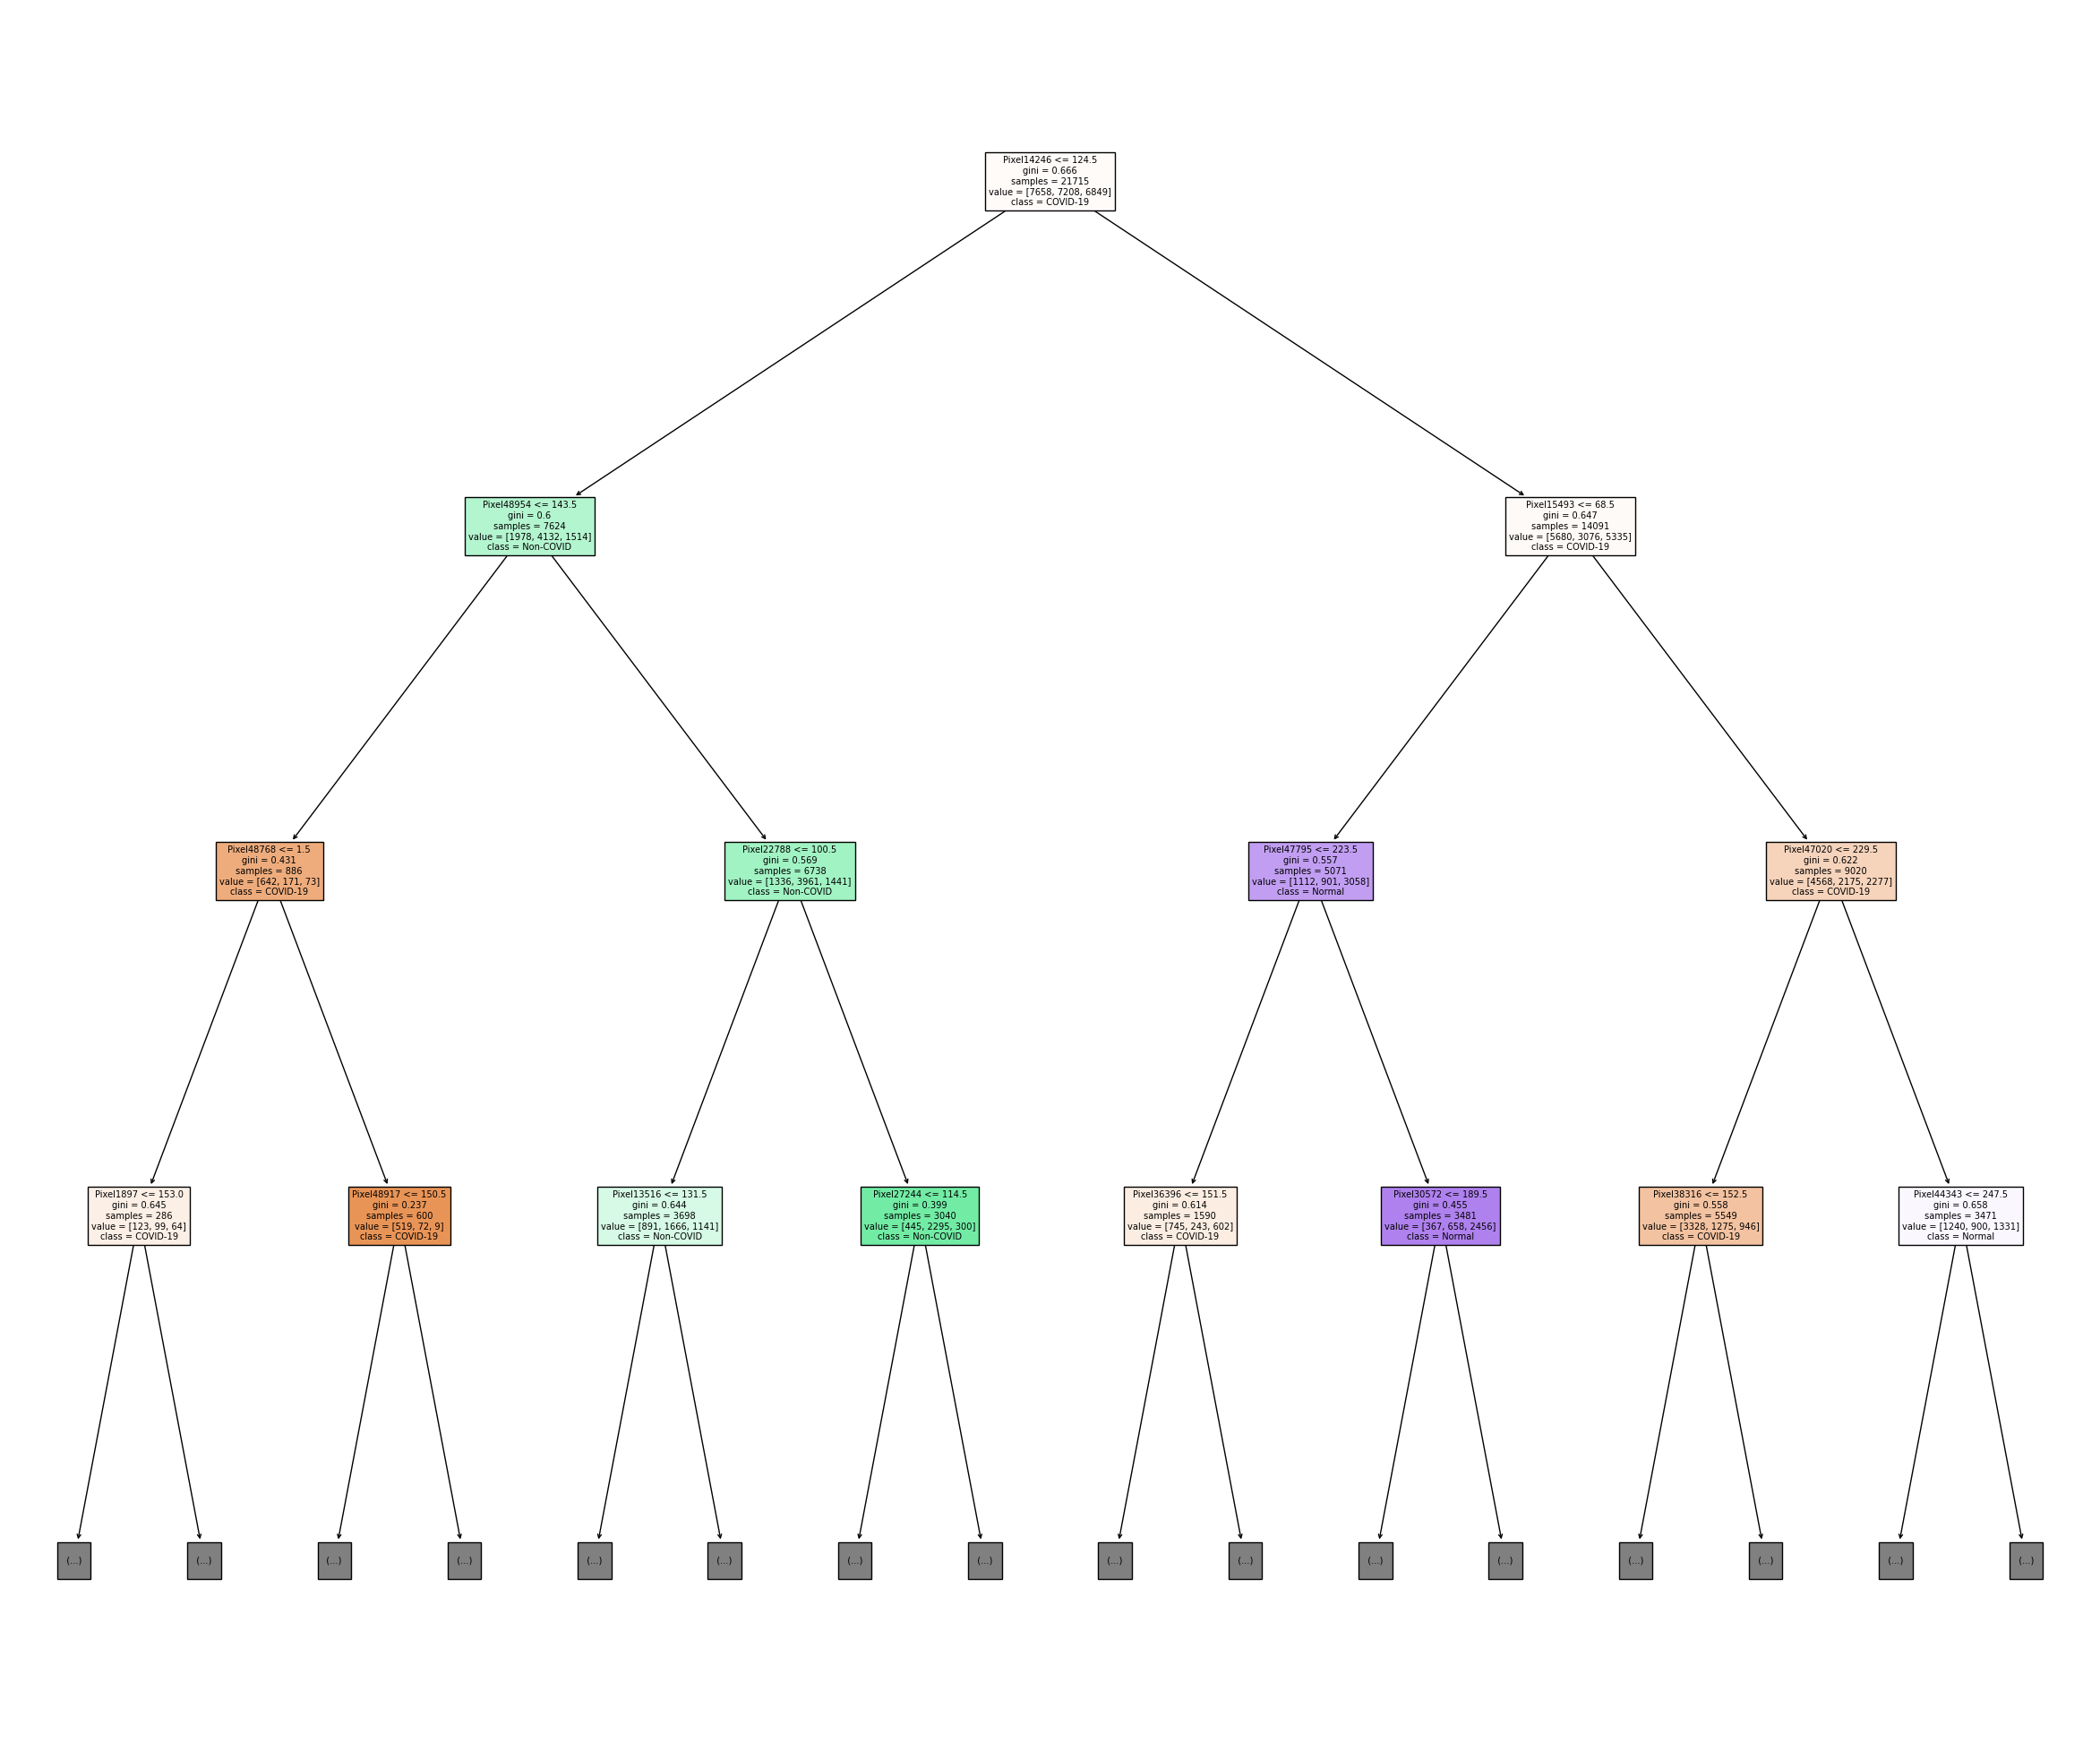

In [ ]:
#Plotting the decision tree
plt.figure(figsize=(30,25))
plot_tree(dt_clf, feature_names = X_train.columns, class_names=label_encoder.classes_, filled=True, max_depth = 3)
plt.show()

[[1400  212  291]
 [ 381 1127  294]
 [ 249  247 1216]]


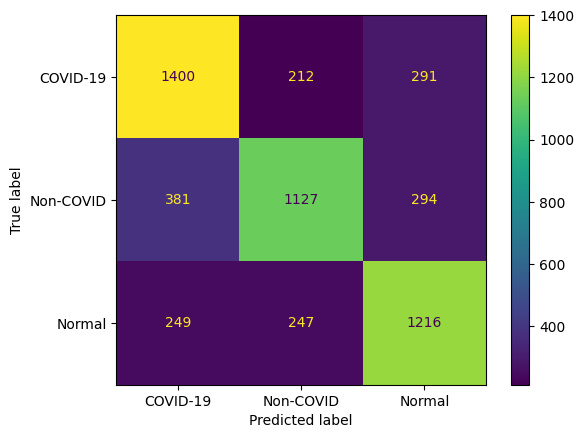

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1903
           1       0.71      0.63      0.67      1802
           2       0.68      0.71      0.69      1712

    accuracy                           0.69      5417
   macro avg       0.69      0.69      0.69      5417
weighted avg       0.69      0.69      0.69      5417




In [ ]:
#Predicted Labels
y_pred = dt_clf.predict(X_val)

#True Labels
y_true = y_val

#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

#Displaying Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

#Displaying the Classification Report
cr = metrics.classification_report(y_true, y_pred)
print(f"Classification report:\n" f"{cr}\n")

Please note that 0 refers to COVID-19, 1 refers to Non-COVID and 2 refers to Normal.

The recall of the class COVID-19 is just 0.74 indicating that there may be many false negatives predicted by this model. This is concerning as we would like to avoid missing the detection of the patients with COVID-19.

### Evaluation of Decision Tree Model on Testing Dataset

In [ ]:
y_pred = dt_clf.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred )
print(f'Testing accuracy = {testing_accuracy*100:.2f}%')

Testing accuracy = 69.27%


[[1760  315  320]
 [ 459 1466  328]
 [ 307  357 1476]]


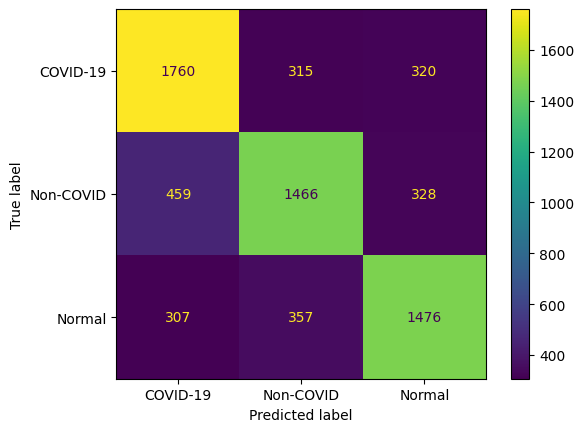

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.72      2395
           1       0.69      0.65      0.67      2253
           2       0.69      0.69      0.69      2140

    accuracy                           0.69      6788
   macro avg       0.69      0.69      0.69      6788
weighted avg       0.69      0.69      0.69      6788




In [ ]:
#Predicted Labels
y_pred = dt_clf.predict(X_test)

#True Labels
y_true = y_test

#Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

#Displaying Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

#Displaying the Classification Report
cr = metrics.classification_report(y_true, y_pred)
print(f"Classification report:\n" f"{cr}\n")

The decision tree model's performance is not the most satisfactory as it does not have a high accuracy. In addition, there is a significant percentage of false positives and false negatives in each class predicted by the model as indicated by the values of precision and recall. This indicates that the model is not very reliable for a model that should aid in medical diagnosis



-------



## **Ensemble ML Model - Random Forest**

For ensemble machine learning model, we chose the random forest model as it makes use of decision trees. Since random forest models use multiple decision trees, they can increase the accuracy compared to a single decision tree. Moreover, random forest work well with high dimensional data as is the case with our dataset, it was chosen for this project.

### Searching for the best parameters for a random forest model

In [ ]:
#Finding the best parameters
n_estimators = [10,20,50,80,100]
max_samples = [0.1,0.2,0.6,0.8,0.9]

best_accuracy = -1
n_estimator = -1
max_sample = -1

for i in n_estimators:
    for j in max_samples:
        rf_classifier = RandomForestClassifier(n_estimators=i, random_state=42, max_samples=j)
        rf_classifier.fit(X_train, y_train)
        y_pred = rf_classifier.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        if (accuracy>best_accuracy):
          best_accuracy = accuracy
          n_estimator = i
          max_sample = j
        print(f'n_estimators={i} max_samples={j} Accuracy={accuracy}')

n_estimators=10 max_samples=0.1 Accuracy=0.7153405944249585
n_estimators=10 max_samples=0.2 Accuracy=0.7406313457633377
n_estimators=10 max_samples=0.6 Accuracy=0.757614916005169
n_estimators=10 max_samples=0.8 Accuracy=0.7522613992985047
n_estimators=10 max_samples=0.9 Accuracy=0.7601993723463172
n_estimators=20 max_samples=0.1 Accuracy=0.7393391175927635
n_estimators=20 max_samples=0.2 Accuracy=0.7638914528336718
n_estimators=20 max_samples=0.6 Accuracy=0.7806904190511353
n_estimators=20 max_samples=0.8 Accuracy=0.7899206202695219
n_estimators=20 max_samples=0.9 Accuracy=0.7906590363669928
n_estimators=50 max_samples=0.1 Accuracy=0.7659220971017168
n_estimators=50 max_samples=0.2 Accuracy=0.7786597747830902
n_estimators=50 max_samples=0.6 Accuracy=0.8022890899021599
n_estimators=50 max_samples=0.8 Accuracy=0.8061657744138823
n_estimators=50 max_samples=0.9 Accuracy=0.8104116669743401
n_estimators=80 max_samples=0.1 Accuracy=0.7688757614916005
n_estimators=80 max_samples=0.2 Accuracy=

From the above experiments, we found the below results:

In [ ]:
n_estimator = 100
max_sample = 0.9
best_accuracy = 0.8196418681927266
print(f'The best validation accuracy = {best_accuracy*100:.2f}%')
print('Best Parameters: ')
print(f'n_estimator = {n_estimator}')
print(f'max_sample = {max_sample}')

The best validation accuracy = 81.96%
Best Parameters: 
n_estimator = 100
max_sample = 0.9


### Random Forest Model Training

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=n_estimator, random_state=42, max_samples=max_sample)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.9, random_state=42)

In [ ]:
print('Random Forest (n_estimators = 100 ; max_samples=0.9)')
y_train_pred = rf_classifier.predict(X_train)
y_val_pred = rf_classifier.predict(X_val)
training_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Training accuracy = {training_accuracy*100:.2f}%')
print(f'Validation accuracy = {val_accuracy*100:.2f}%')

Random Forest (n_estimators = 100 ; max_samples=0.9)
Training accuracy = 100.00%
Validation accuracy = 81.96%


### Evaluation of Random Forest Model on Testing dataset

In [ ]:
y_pred = rf_classifier.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred )
print(f'Testing accuracy = {testing_accuracy*100:.2f}%')

Testing accuracy = 83.07%


The random forest model has a good performance on the testing dataset. This shows that using a random forest model that makes use of multiple decision trees is much better than a model which is a singular decision tree.



-------



## **Deep Learning Model - CNN**

We have chosen CNN as the architecture for our deep learning model as CNN would be suitable to analyse grid-like data like images. Since our task involves analysing X-ray images, we found CNN to be an appropriate choice.

### Data Preparation and Preprocessing

First we will define a PyTorch Dataset class named ChestXRayDataset. This class facilitates easy access to chest X-ray images along with their labels, making it suitable for training and testing.

In [ ]:
class ChestXRayDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.classes = [cls for cls in os.listdir(root_dir) if "lung masks" not in cls.lower()]
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}
        self.images = []

        for cls in self.classes:
            class_path = os.path.join(root_dir, cls, "images")
            for img_name in os.listdir(class_path):
                self.images.append((os.path.join(class_path, img_name), self.class_to_idx[cls]))
        self.transform = transform

    # Returns the total number of images in the dataset.
    def __len__(self):
        return len(self.images)

    # To retrieve an item from the dataset at a given index
    def __getitem__(self, idx):
        img_path, label = self.images[idx]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
# Data Augmentation
desired_height = 128
desired_width = 128

transform = transforms.Compose([
    # Resize the images
    transforms.Resize((desired_height, desired_width)),
    # Apply a random rotation to the images by a maximum of 15 degrees in either direction
    transforms.RandomRotation(degrees=15),
    # Convert the images to PyTorch tensors
    transforms.ToTensor(),
])

In [ ]:
# Creating datasets for training, validation, and testing
train_dataset = ChestXRayDataset(root_dir=f'/content/{base_path}/Train/', transform=transform)
val_dataset = ChestXRayDataset(root_dir=f'/content/{base_path}/Val/', transform=transform)
test_dataset = ChestXRayDataset(root_dir=f'/content/{base_path}/Test/', transform=transform)

print("Training Dataset size: ", len(train_dataset))
print("Validation Dataset size: ", len(val_dataset))
print("Test Dataset size: ", len(test_dataset))

Training Dataset size:  21715
Validation Dataset size:  5417
Test Dataset size:  6788


In [ ]:
for class_name, idx in train_dataset.class_to_idx.items():
    print(f"Class: {class_name}, Index: {idx}")

Class: Normal, Index: 0
Class: Non-COVID, Index: 1
Class: COVID-19, Index: 2


In [ ]:
# Creating a DataLoader for the datasets with a batch size of 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

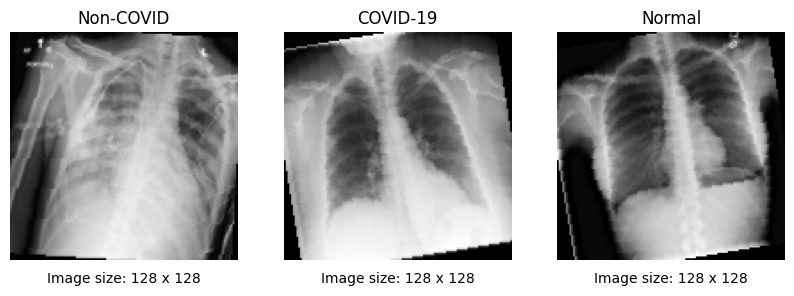

In [ ]:
# Randomly selects images from the three different datasets (train, validation, and test) and displays them
def plt_img(axis, image, label, class_names):
    axis.imshow(image.permute(1, 2, 0).squeeze(), cmap='gray')
    axis.text(0.5, -0.10, f"Image size: {image.shape[1]} x {image.shape[2]}", size=10, ha="center", transform=axis.transAxes)
    axis.set_title(class_names[label])
    axis.axis('off')

def display_sample(dataset, axis, class_names):
    repeat = True
    while(repeat):
      image, label = random.choice(dataset)
      if label not in chosen_classes:
        chosen_classes.append(label)
        repeat = False
    plt_img(axis, image, label, class_names)


# Creating a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

# List to keep track of chosen classes to ensure each subplot shows a different class
chosen_classes = []

display_sample(train_dataset, ax1, train_dataset.classes)
display_sample(val_dataset, ax2, val_dataset.classes)
display_sample(test_dataset, ax3, test_dataset.classes)
chosen_classes.clear()

plt.show()

The images are randomly rotated by a maximum of 15 degrees in either direction and resized to 128x128 pixels.

The images were resized to 128x128 pixels because of constraints in the resources provided by a free Colab account.

### Defining the Convolutional Neural Network

In [ ]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self, num_classes):
        super(ConvolutionalNetwork, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # Define max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Define fully connected layers
        self.fc1 = nn.Linear(64 * 32 * 32, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)   # Output layer

    def forward(self, x):
        # Apply convolutional and pooling layers
        out = self.pool(torch.relu(self.conv1(x)))
        out = self.pool(torch.relu(self.conv2(out)))
        # Flatten the output from convolutional layers
        out = out.view(out.size(0), -1)
        # Apply fully connected layers
        out = torch.relu(self.fc1(out))
        out = torch.relu(self.fc2(out))
        out = self.fc3(out)
        # Apply softmax activation to obtain class probabilities
        return torch.softmax(out, dim=1)


In [ ]:
model = ConvolutionalNetwork(len(train_dataset.classes))
model

In [ ]:
# Loss Function Optimizer
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Train the model
n_total_steps = len(train_loader)
num_epochs = 5

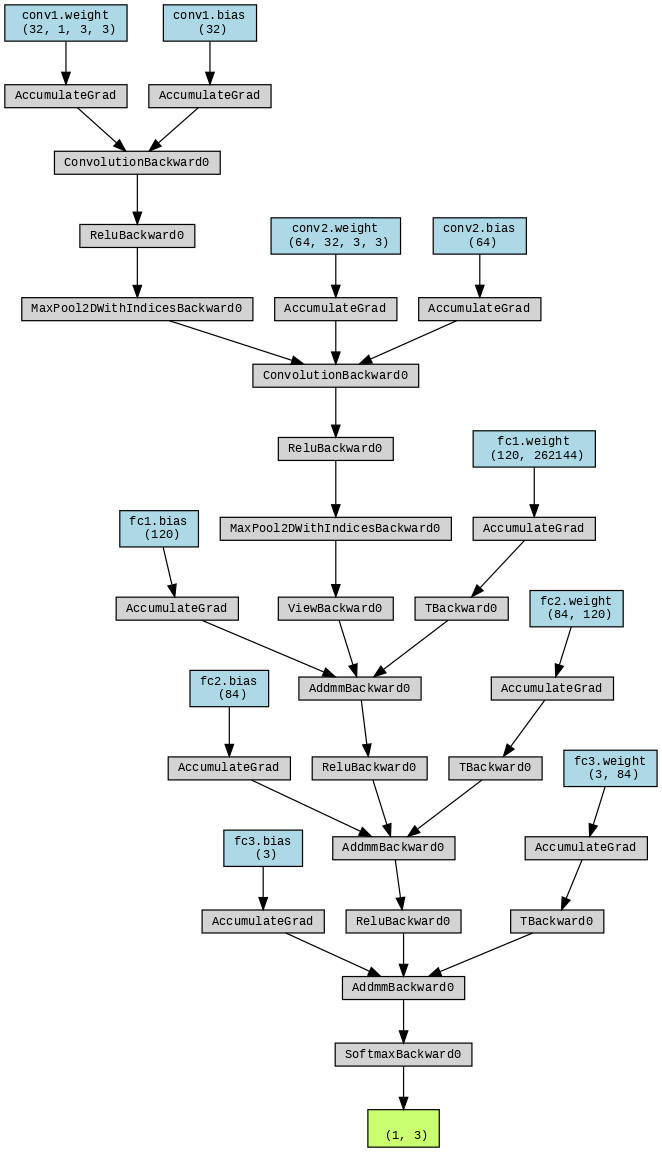

In [ ]:
# Visualizing the architecture of convolutional neural networks
graph = make_dot(output, params=dict(model.named_parameters()))
graph.format = 'svg'
Image('model.png')

### Training the CNN model

In [ ]:
val_losses = []
val_accuracies = []

for epoch in tqdm(range(num_epochs), leave=False):
    # Training Phase
    model.train()

    for i, (images, labels) in tqdm(enumerate(train_loader),
                                    leave=False,
                                    total=len(train_loader)):
      # images = images.to(device)
      # labels = labels.to(device)
      # Forward pass
      outputs = model(images)
      loss = lossfun(outputs, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Printing training loss every 100 steps
      if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = lossfun(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    # Calculate and store validation loss and accuracy for the current epoch
    val_losses.append(val_loss / len(val_loader))
    val_accuracy = 100.0 * correct_val / total_val
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.2f}%')

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/679 [00:00<?, ?it/s]

Epoch [1/5], Step [100/679], Loss: 0.9478
Epoch [1/5], Step [200/679], Loss: 0.7386
Epoch [1/5], Step [300/679], Loss: 0.8787
Epoch [1/5], Step [400/679], Loss: 0.7266
Epoch [1/5], Step [500/679], Loss: 0.7746
Epoch [1/5], Step [600/679], Loss: 0.8145
Epoch [1/5], Val Loss: 0.8549, Val Accuracy: 68.65%


  0%|          | 0/679 [00:00<?, ?it/s]

Epoch [2/5], Step [100/679], Loss: 0.8357
Epoch [2/5], Step [200/679], Loss: 0.7819
Epoch [2/5], Step [300/679], Loss: 0.8820
Epoch [2/5], Step [400/679], Loss: 0.9625
Epoch [2/5], Step [500/679], Loss: 0.8910
Epoch [2/5], Step [600/679], Loss: 0.8332
Epoch [2/5], Val Loss: 0.8295, Val Accuracy: 71.35%


  0%|          | 0/679 [00:00<?, ?it/s]

Epoch [3/5], Step [100/679], Loss: 0.9265
Epoch [3/5], Step [200/679], Loss: 0.7383
Epoch [3/5], Step [300/679], Loss: 0.6565
Epoch [3/5], Step [400/679], Loss: 0.7385
Epoch [3/5], Step [500/679], Loss: 0.7940
Epoch [3/5], Step [600/679], Loss: 0.7285
Epoch [3/5], Val Loss: 0.7753, Val Accuracy: 76.74%


  0%|          | 0/679 [00:00<?, ?it/s]

Epoch [4/5], Step [100/679], Loss: 0.7847
Epoch [4/5], Step [200/679], Loss: 0.7916
Epoch [4/5], Step [300/679], Loss: 0.7602
Epoch [4/5], Step [400/679], Loss: 0.7819
Epoch [4/5], Step [500/679], Loss: 0.6805
Epoch [4/5], Step [600/679], Loss: 0.8223
Epoch [4/5], Val Loss: 0.7775, Val Accuracy: 76.59%


  0%|          | 0/679 [00:00<?, ?it/s]

Epoch [5/5], Step [100/679], Loss: 0.7120
Epoch [5/5], Step [200/679], Loss: 0.7829
Epoch [5/5], Step [300/679], Loss: 0.8222
Epoch [5/5], Step [400/679], Loss: 0.8113
Epoch [5/5], Step [500/679], Loss: 0.7488
Epoch [5/5], Step [600/679], Loss: 0.7256
Epoch [5/5], Val Loss: 0.7468, Val Accuracy: 79.47%


### Evaluation of the CNN model:

5


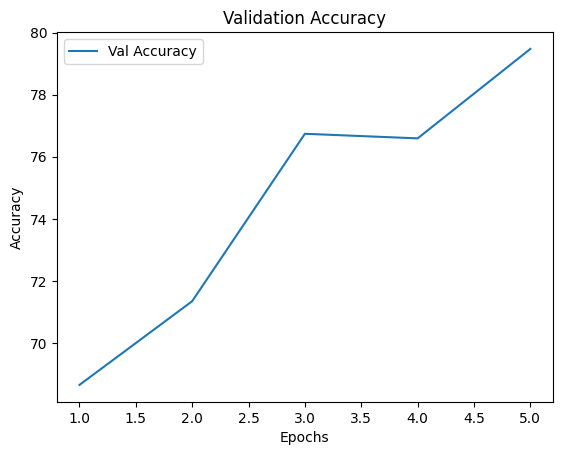

In [ ]:
# Plotting the validation accuracies over multiple epochs
print(len(val_accuracies))
plt.plot(range(1, num_epochs+1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

The validation accuracy of the model increases as the number of epochs rises. This indicates that the model is learning and enhancing its ability to classify data accurately. However, the risk of overfitting also escalates with the increase in epochs.

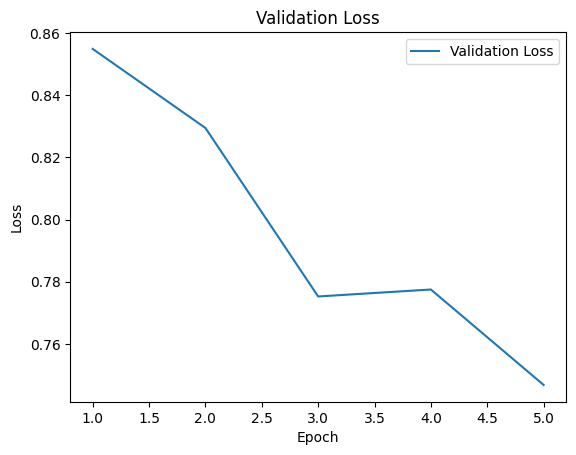

In [ ]:
# Plot validation loss history
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Evaluates the trained model on the test dataset and computes the accuracy
with torch.no_grad():
    criterion = nn.CrossEntropyLoss()
    model.eval()
    n_correct = 0
    test_loss = 0

    for images, labels in test_loader:
        output = model(images)

        test_loss += criterion(output, labels).item()
        _, predicted = torch.max(output.data, 1)
        n_correct += (predicted == labels).sum().item()
        true_labels.extend(labels.tolist())
        predicted_labels.extend(predicted.tolist())


    test_loss /= len(test_loader)
    acc = 100.0 * n_correct / len(test_dataset)
    print(f'Average Loss: {test_loss}\nAccuracy of the NN on the {len(test_dataset)} test images: {acc} %')

Average Loss: 0.731799559973775
Accuracy of the NN on the 6788 test images: 81.23158515026518 %


In [ ]:
# Calculate evaluation metrics
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precision: 0.81
Recall: 0.79
F1-score: 0.79


### Empirical Experiments:

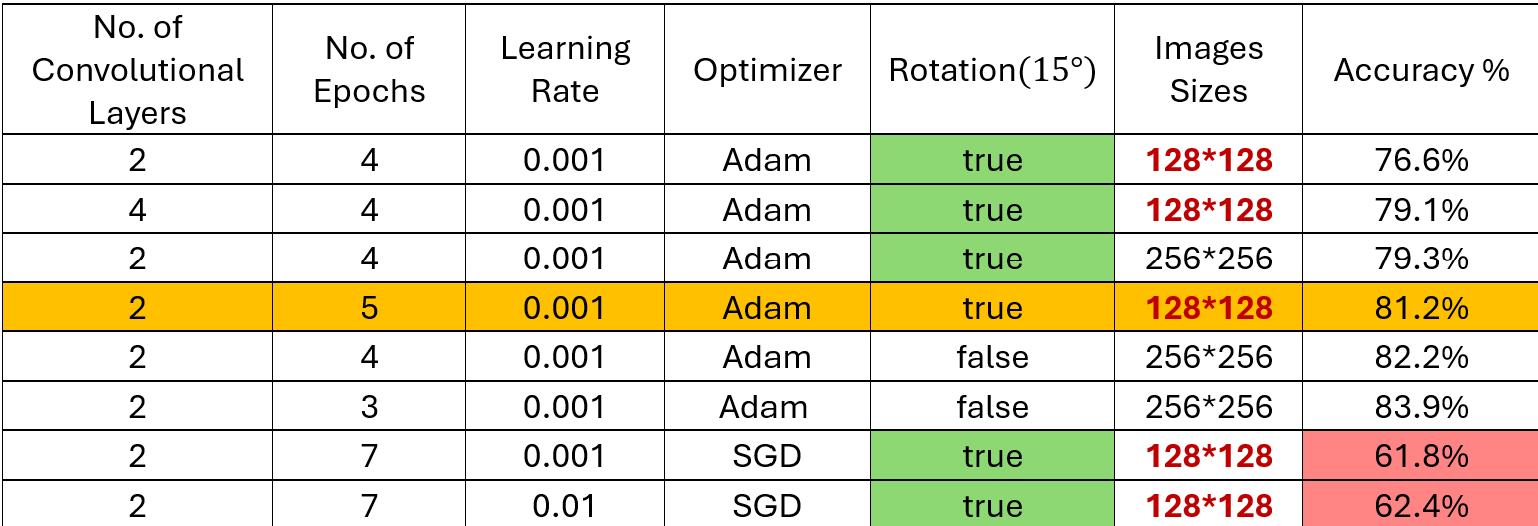





The highlighted row shows the parameters of the CNN model that is most appropriate for our project currently. We have chosen the one which uses 128x128 image size because this suits our current resources.
<br><br>
However, we can see in our experiments that the model would perform much better if the images of size 256x256 were used for training.

*   Adam optimizer generally performs better than SGD in this context, as seen in the first six experiments where Adam is used and achieves higher accuracy compared to SGD.
*   Increasing image sizes can lead to better accuracy.
*   It appears that using Adam optimizer with a moderate number of convolutions, epochs, and a learning rate of 0.001, along with larger image sizes, tends to yield the best accuracy.
*   Several techniques can be employed to maximize accuracy. However, resource constraints have limited our ability to extensively explore and optimize all parameters.





-------



## **Conclusion**

Project Findings:


*   We implemented three different models: Decision Tree, Random Forest and CNN.
*   Decision tree and random forest models required manual feature extraction from the images which is not practical for large images and creates high dimensionality.
*   The benefit of CNN is that it automatically learns the features from the raw images and hence is more practical.
*   Decision tree performed poorly compared to the other two models.
*   Random forest model had a relatively good performance.
*   CNN performed well within the resource constraints and could have a much better performance if the original image sizes were used.








Experience with Colab:



*   Colab enabled us to perform image classification using a large dataset of X-ray images whose size were of 256x256 pixels. This would not have been possible using our personal machines.
*   Colab created a shared collaborative environment to train our machine learning models.
*   We made use of TPU and GPU to perform model training.
*   TPU made the process much faster and provided more RAM (300+ GB) compared to GPU. However, TPU has a usage limit and in those cases, we employed the use of GPU.
*   Primarily, TPU was used for all model training. However, GPU was used when access to TPU was not available for CNN model training. But, this was not optimal because GPU provides very less RAM (12 GB).
*   Since we were using free Colab account, there were cases where we would wait for the CNN model to finish training but the runtime would get disconnected in the middle of training time or as soon as training was completed.
*   These limitations prevented us from extensively exploring and optimizing all parameters.







